# AUTO-MPG PREDICTION

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Importing Data

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9e44cb495202475f885103b186419e36 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ZkHJgzcyJriTswvzQVuYvvvEAcY1cX07gtn_XBVKIeGa',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_1 = client_9e44cb495202475f885103b186419e36.get_object(Bucket='trialproject-donotdelete-pr-wzu569gdm4swro', Key='auto-mpg.data')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.MethodType( __iter__, streaming_body_1 ) 
header = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model-year','origin','car-name']
raw_data = pd.read_csv(streaming_body_1,delim_whitespace=True, names=header)
raw_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year,origin,car-name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


Checking and handling missing values

In [3]:
df = raw_data.copy()
df.info() #'horsepower' type is object,  we need to check it.
df['horsepower'].unique() #There are '?' values in this column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model-year      398 non-null int64
origin          398 non-null int64
car-name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [4]:
df['horsepower'] = df['horsepower'].replace('?', np.nan) #Replace '?' with NaN so the values will detect as null or missing value
df.info() #There 6 missing values in columns horsepower

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model-year      398 non-null int64
origin          398 non-null int64
car-name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


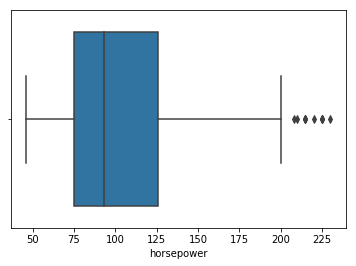

In [5]:
#Before replacing the data, we need to check the outliers using boxplot
sns.boxplot(x=df['horsepower'].astype(float)) #There are 6 outliers in this data, so we must use median to replace missing value

In [6]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].dropna().astype(float).median()).astype(float)
df.info() #Missing value already filled by median

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model-year      398 non-null int64
origin          398 non-null int64
car-name        398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


Data Exploration

In [7]:
#First We drop columns car-name because it is categorical values that we dont't used in this project
df = df.drop(columns = 'car-name')
df.head()
#We don't predict MPG based car-name

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [8]:
#As you can see the values on origin columns are numerical, it is supposed to be string that reflected the origin of the car
data = df.copy()
data['origin'] = data['origin'].map({1: 'America', 2: 'Europe', 3 : 'Asia'})
data.head() #And now, our data is ready to go for exploration

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,America
1,15.0,8,350.0,165.0,3693.0,11.5,70,America
2,18.0,8,318.0,150.0,3436.0,11.0,70,America
3,16.0,8,304.0,150.0,3433.0,12.0,70,America
4,17.0,8,302.0,140.0,3449.0,10.5,70,America


4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: cylinders, dtype: float64

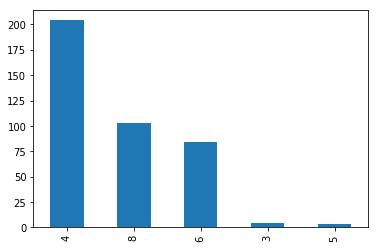

In [9]:
#From this data, there are 2 columns that supposed to be categorical columns. That is cylinders and origin
#So we need to check the distribution of these columns

#First we check the distribution from cylinders column
data['cylinders'].value_counts().plot(kind='bar')
data['cylinders'].value_counts() / len(data)
#From this plot, we know that this column is not balanced

America    0.625628
Asia       0.198492
Europe     0.175879
Name: origin, dtype: float64

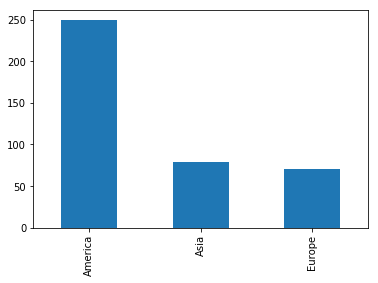

In [10]:
#Second we check the distribution from origin column
data['origin'].value_counts().plot(kind='bar')
data['origin'].value_counts() / len(data)
#From this plot, we know that this column is not balanced

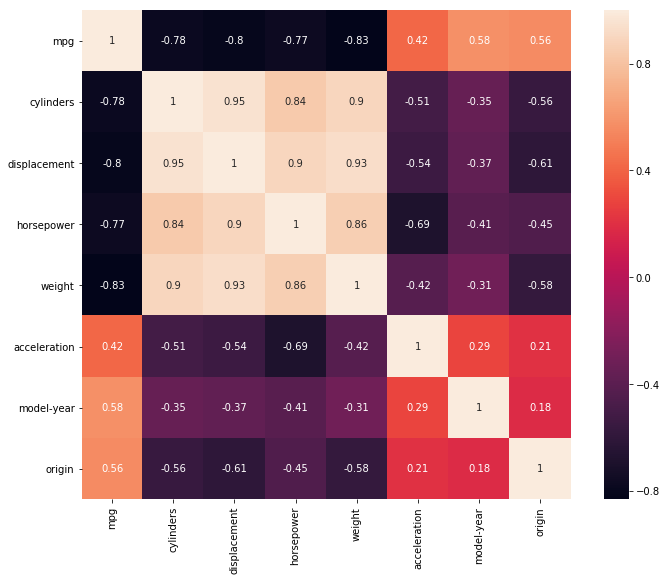

In [11]:
#Let's take a side of categorical columns distribution
#Now we want to check the correlation between each columns using heatmap
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, square=True);
#From this plot we have 4 columns that strongly negative correlated to our target column (mpg) : cylinders, displacement, horsepower, and weight

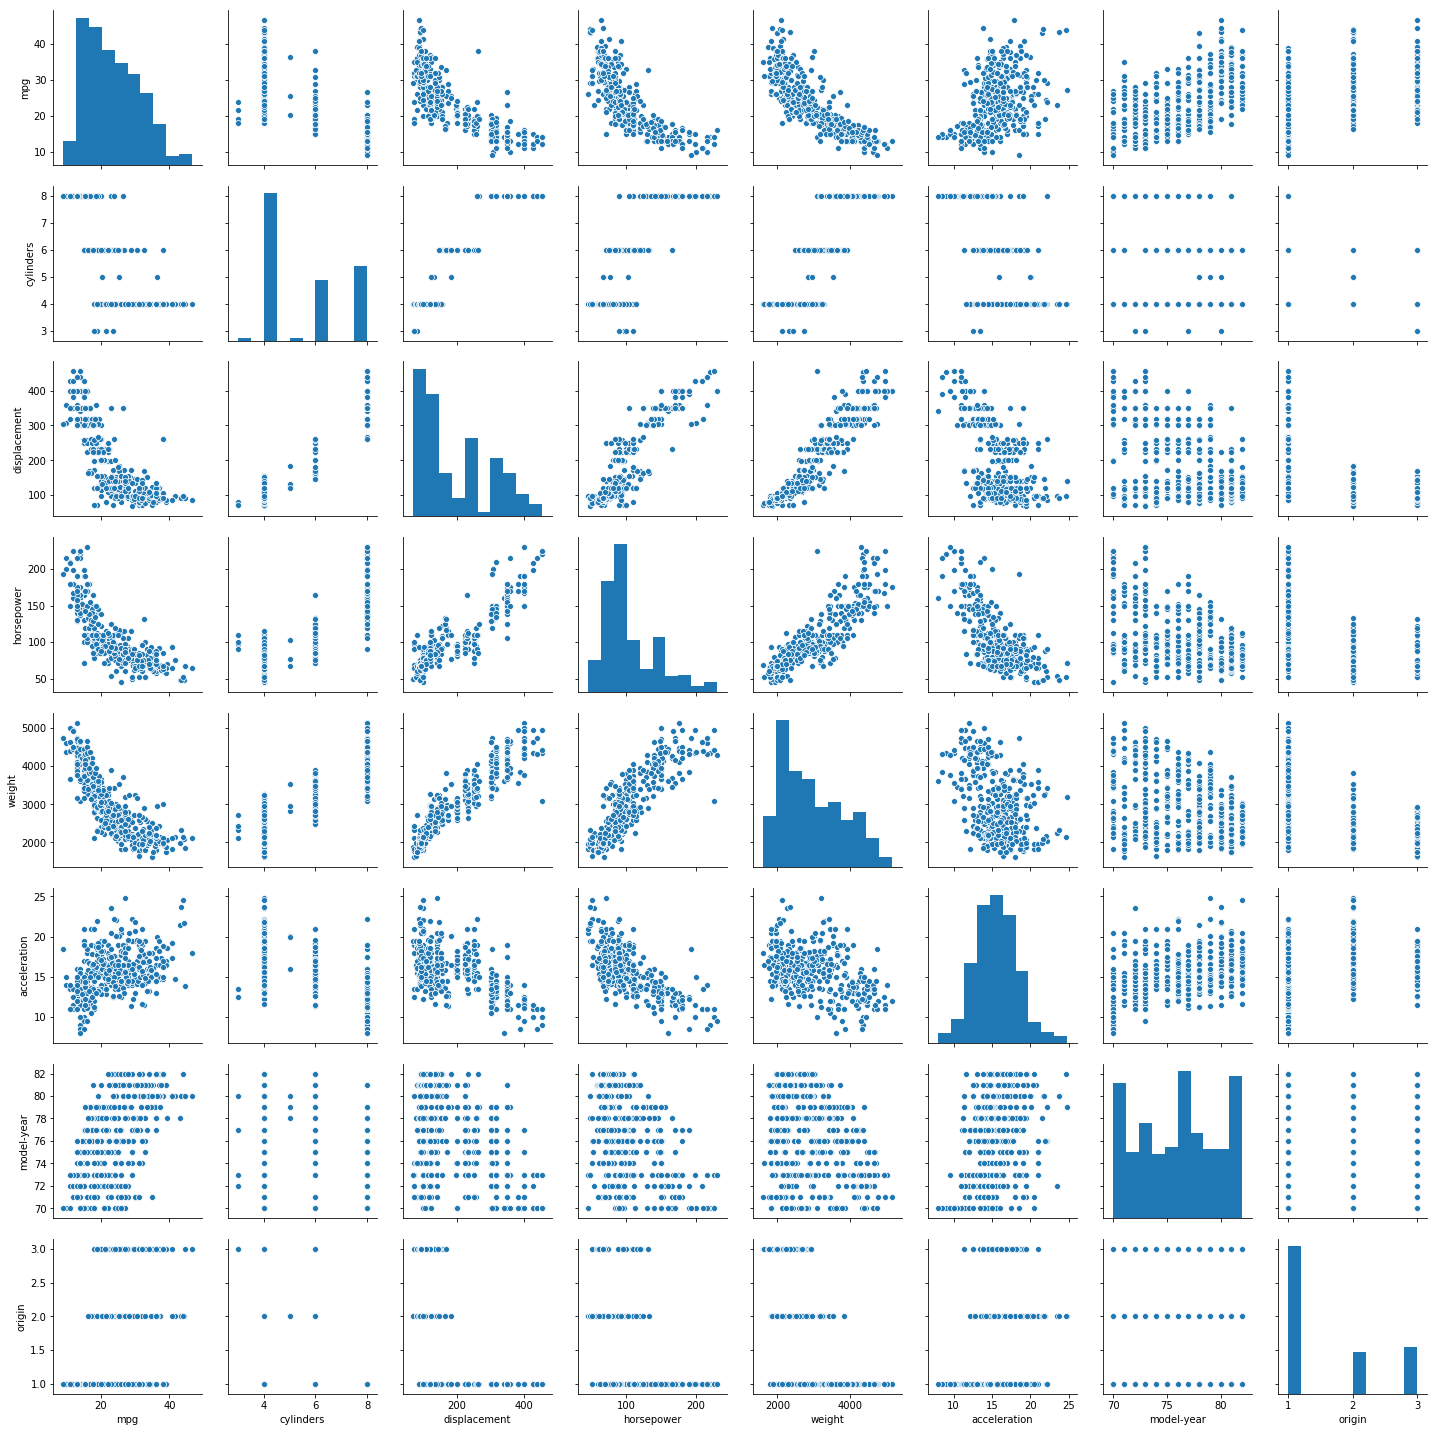

In [12]:
#Let's visualize the correlation of each columns
sns.pairplot(df)
plt.show()

In [13]:
#from exploration data, we found that cylinders, displacement, horsepower, and weight have strong negative correlation with MPG

Train and test data selection

In [14]:
#First we will convert the origin column using one hot encoder technique, so it can be used as feature in machine learning process
data = pd.get_dummies(data, prefix='', prefix_sep='')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year,America,Asia,Europe
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [15]:
#Now all columns are numerical and good to go, but we have another problem
#Remember, cylinders distribution not balance, so we need to keep our data train and test split following this distribution
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["cylinders"]):
    data_train_set = data.loc[train_index]
    data_test_set = data.loc[test_index]
X_train = data_train_set.drop("mpg", axis=1)
y_train = data_train_set["mpg"].copy()
X_test = data_test_set.drop("mpg", axis=1)
y_test = data_test_set["mpg"].copy()

In [16]:
#Checking distribution column cylinders in train data
X_train['cylinders'].value_counts() / len(X_train)

4    0.512579
8    0.257862
6    0.210692
5    0.009434
3    0.009434
Name: cylinders, dtype: float64

In [17]:
#Checking distribution column cylinders in test data
X_test['cylinders'].value_counts() / len(X_test)

4    0.5125
8    0.2625
6    0.2125
3    0.0125
Name: cylinders, dtype: float64

Modelling

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

lr=LinearRegression()

# Fit
lr.fit(X_train,y_train)

# Predict
y_pred=lr.predict(X_test)

#Score
r_squared = r2_score(y_test, y_pred)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print(r_squared)
print(lin_rmse)

0.8327185542980282
3.3934935893549882


In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_test)
pr = LinearRegression()

# Fit
pr.fit(X_train_, y_train)

# Predict
y_pred_=pr.predict(X_test_)

#Score
r_squared_ = r2_score(y_test, y_pred_)
lin_mse_ = mean_squared_error(y_test, y_pred_)
lin_rmse_ = np.sqrt(lin_mse_)
print(r_squared_)
print(lin_rmse_)

0.7715905464613614
3.965337744488329
